# Plotting evolution of kMC data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper') # paper, notebook, talk, poster

from matplotlib.colors import LinearSegmentedColormap
red = (0.750, 0.342, 0.228, 1.0)
color_list = [ # based on the cmocean.cm.balance colourmap
    (0.093, 0.111, 0.262, 1.0),
    (0.221, 0.532, 0.728, 1.0),
    (0.945, 0.928, 0.923, 1.0),
    (0.750, 0.342, 0.228, 1.0),
    (0.236, 0.035, 0.069, 1.0)
            ]
cmap = LinearSegmentedColormap.from_list('asi', color_list, N=len(color_list))

## Figure 2

CPU times: total: 33.6 s
Wall time: 33.9 s


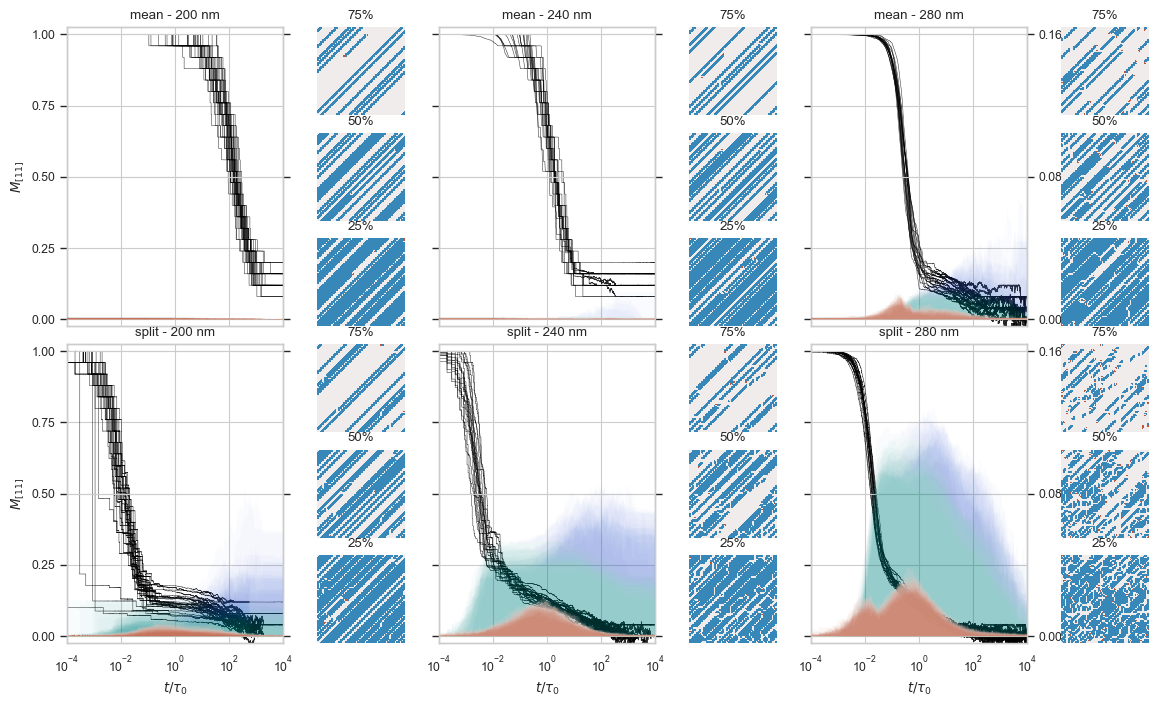

In [2]:
%%time

temperature, size = 300, 50
periodicity_list = [200, 240, 280]
model_list = ['mean', 'split']
quantile_list = [0.75, 0.5, 0.25]

fig_width, fig_height = 14, 8
ax_height = fig_height/6
plot_width = (fig_width - 3*ax_height)/3-0.25

fig = plt.figure(figsize=(fig_width, fig_height))
gs = gridspec.GridSpec(6, 6, width_ratios=(plot_width, ax_height)*3)
for i, model in enumerate(model_list):
    for j, periodicity in enumerate(periodicity_list):

        # main plot of time evolution 
        ax = plt.subplot(gs[3*i:3*i+3,2*j])
        ax.set_title(f'{model} - {periodicity} nm')
        ax.set_ylim(-0.025, 1.025)
        ax.set_yticks([0,0.25,0.5,0.75,1])
        ax.set_xscale('log')
        ax.set_xlim(1e-4, 1e+4)
        if j != 0: ax.set_yticklabels([])
        if j == 0: ax.set_ylabel('$M_{[11]}$')
        if i == 0: ax.set_xticklabels([])
        if i == 1: ax.set_xlabel('$t/\\tau_0$')

        # load data
        out_name = f'./{model}_{periodicity:.0f}nm_{temperature:.0f}K_{size}x{size}'
        images = np.load(f'{out_name}_verteximage.npz', allow_pickle=True)['images'][()]
        data = pd.read_csv(f'{out_name}_global.dat') # _spins.dat

        # plot global data - M_[11]
        for run_index in range(len(data.columns) // 5):
            ax.plot(  data[f't_run{run_index}'], data[f'm_run{run_index}'], alpha=0.85, color='black', linewidth=0.35, zorder=15 )

        # plot global data - T3 and T2\ne11
        ax_T3 = ax.twinx()
        y_range = 0.16
        ax_T3.set_ylim(-0.025*y_range, (1+0.025)*y_range)
        ax_T3.set_yticks(np.linspace(0, y_range, 3)) 
        if j != 2: ax_T3.set_yticklabels([])
        for run_index in range(len(data.columns) // 5):
            ax_T3.stackplot( data[f't_run{run_index}'], [data[f'T2_perp_run{run_index}'] , data[f'T2_opp_run{run_index}']],
                               #, 0, 
                               alpha=0.025, linewidth=0, zorder=2
                                , colors=['darkcyan', 'royalblue']
                               )
            # non-transparent backing for the T3 vertices
            ax_T3.fill_between( data[f't_run{run_index}'], data[f'T3_run{run_index}'], 0, 
                               alpha=0.15, color='white', linewidth=0, zorder=4 ) # colour hex = fcf6f4ff
            ax_T3.fill_between( data[f't_run{run_index}'], data[f'T3_run{run_index}'], 0, 
                               alpha=0.05, color=red, linewidth=0, zorder=5 ) # colour hex = fcf6f4ff
        ax_T3.set_rasterization_zorder(10) # rasterise the shaded areas

        # vertex snapshots
        run_index = 0
        for k, quantile in enumerate(quantile_list):
            ax = plt.subplot(gs[3*i+k,2*j+1])
            #ax.set_title(f'$M_{{[11]}}$={quantile:.2f}')
            ax.imshow( images[f'run{run_index}_{quantile}'], 
                cmap=cmap, vmin=0, vmax=4, zorder=1,
                origin = 'lower', extent=np.array((0, size, 0, size)) )
            ax.axis('off')
            ax.set_rasterization_zorder(10) # rasterise the snapshots
            ax.set_title(f"{quantile:.0%}")

## Figure 6

CPU times: total: 36.7 s
Wall time: 37.1 s


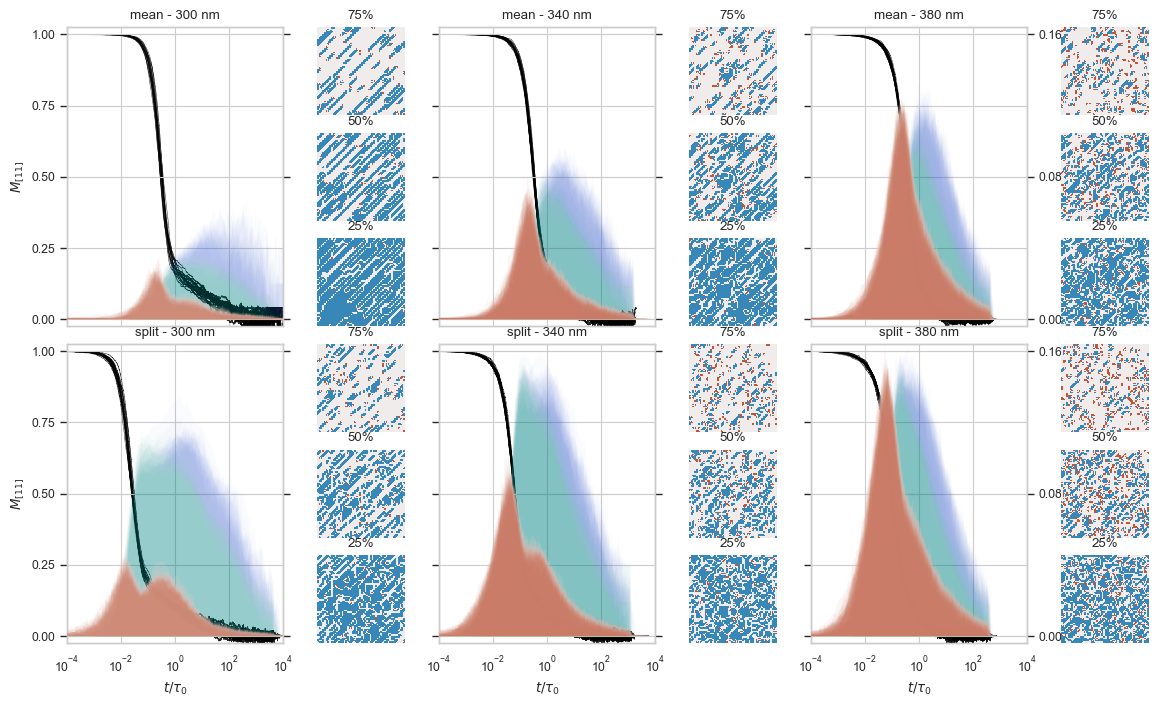

In [3]:
%%time

temperature, size = 300, 50
periodicity_list = [300, 340, 380]
model_list = ['mean', 'split']
quantile_list = [0.75, 0.5, 0.25]

fig_width, fig_height = 14, 8
ax_height = fig_height/6
plot_width = (fig_width - 3*ax_height)/3-0.25

fig = plt.figure(figsize=(fig_width, fig_height))
gs = gridspec.GridSpec(6, 6, width_ratios=(plot_width, ax_height)*3)
for i, model in enumerate(model_list):
    for j, periodicity in enumerate(periodicity_list):

        # main plot of time evolution 
        ax = plt.subplot(gs[3*i:3*i+3,2*j])
        ax.set_title(f'{model} - {periodicity} nm')
        ax.set_ylim(-0.025, 1.025)
        ax.set_yticks([0,0.25,0.5,0.75,1])
        ax.set_xscale('log')
        ax.set_xlim(1e-4, 1e+4)
        if j != 0: ax.set_yticklabels([])
        if j == 0: ax.set_ylabel('$M_{[11]}$')
        if i == 0: ax.set_xticklabels([])
        if i == 1: ax.set_xlabel('$t/\\tau_0$')

        # load data
        out_name = f'./{model}_{periodicity:.0f}nm_{temperature:.0f}K_{size}x{size}'
        images = np.load(f'{out_name}_verteximage.npz', allow_pickle=True)['images'][()]
        data = pd.read_csv(f'{out_name}_global.dat') # _spins.dat

        # plot global data - M_[11]
        for run_index in range(len(data.columns) // 5):
            ax.plot(  data[f't_run{run_index}'], data[f'm_run{run_index}'], alpha=0.85, color='black', linewidth=0.35, zorder=15 )

        # plot global data - T3 and T2\ne11
        ax_T3 = ax.twinx()
        y_range = 0.16
        ax_T3.set_ylim(-0.025*y_range, (1+0.025)*y_range)
        ax_T3.set_yticks(np.linspace(0, y_range, 3)) 
        if j != 2: ax_T3.set_yticklabels([])
        for run_index in range(len(data.columns) // 5):
            ax_T3.stackplot( data[f't_run{run_index}'], [data[f'T2_perp_run{run_index}'] , data[f'T2_opp_run{run_index}']],
                               #, 0, 
                               alpha=0.025, linewidth=0, zorder=2
                                , colors=['darkcyan', 'royalblue']
                               )
            # non-transparent backing for the T3 vertices
            ax_T3.fill_between( data[f't_run{run_index}'], data[f'T3_run{run_index}'], 0, 
                               alpha=0.15, color='white', linewidth=0, zorder=4 ) # colour hex = fcf6f4ff
            ax_T3.fill_between( data[f't_run{run_index}'], data[f'T3_run{run_index}'], 0, 
                               alpha=0.05, color=red, linewidth=0, zorder=5 ) # colour hex = fcf6f4ff
        ax_T3.set_rasterization_zorder(10) # rasterise the shaded areas

        # vertex snapshots
        run_index = 0
        for k, quantile in enumerate(quantile_list):
            ax = plt.subplot(gs[3*i+k,2*j+1])
            #ax.set_title(f'$M_{{[11]}}$={quantile:.2f}')
            ax.imshow( images[f'run{run_index}_{quantile}'], 
                cmap=cmap, vmin=0, vmax=4, zorder=1,
                origin = 'lower', extent=np.array((0, size, 0, size)) )
            ax.axis('off')
            ax.set_rasterization_zorder(10) # rasterise the snapshots
            ax.set_title(f"{quantile:.0%}")

## Figure 3

CPU times: total: 56.5 s
Wall time: 56.7 s


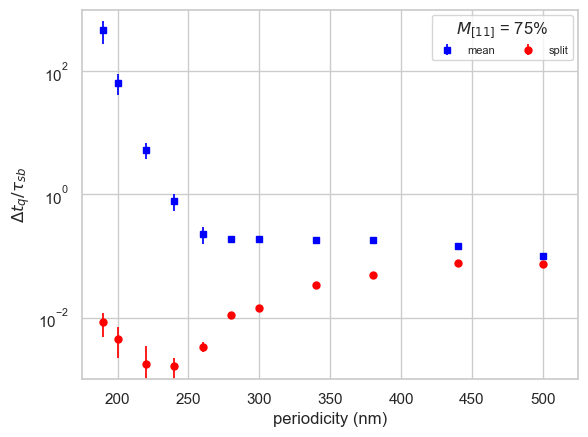

In [4]:
%%time

temperature, size = 300, 50
periodicity_list = [190,200,220,240,260,280,300,340,380,440,500]
model_list = ['mean', 'split']

sns.set_context("notebook")
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)

ax.set_xlim(175, 525)
ax.set_xlabel('periodicity (nm)')
ax.set_ylabel("$\Delta t_q/\\tau_{sb}$")
ax.set_yscale('log')
ax.set_ylim(1e-3, 1e+3)
ax.set_yticks([1e-2, 1, 1e+2])

for i, model in enumerate(model_list):
    color = ["blue", "red"][i]
    marker = ["s", "o"][i]
    for k, periodicity in enumerate(periodicity_list[::-1]):

        # load data
        out_name = f'./{model}_{periodicity:.0f}nm_{temperature:.0f}K_{size}x{size}'
        data = pd.read_csv(f'{out_name}_global.dat')

        # get time corresponding to 75% quantile (within 2%)
        t_list_75 = [np.nan]
        t_quantile_75 = np.nan
        for run_index in range(len(data.columns) // 5):
            if np.min(np.abs(data[f"m_run{run_index}"]-0.75)) < 0.02: # stay within 2%
                t_quantile_75 = np.array(data[f"t_run{run_index}"])[np.argmin(np.abs(data[f"m_run{run_index}"]-0.75))]
            if np.sum(np.isnan([0,5])) == 0:
                t_list_75.append(t_quantile_75)

        # plot up results
        if np.sum(1-np.isnan(t_list_75)) > 3: # have at least 3 points for statistics!
            if k == 0: label=model
            else: label=f"_{model}" # hide label for runs with index > 0
            ax.errorbar(
                periodicity, np.nanmean(t_list_75), np.nanstd(t_list_75), label=label,
                marker=marker, linewidth=0, elinewidth=1.25, color=color, markersize=5
                )

ax.legend(loc="upper right", title=f"$M_{{[11]}}$ = 75%", fontsize=8, ncols=2)